In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
if not os.path.exists('img/ch-5'):
    os.makedirs('img/ch-5', exist_ok=True)

# 5장. 다변수함수의 미분 

## 5.1 방향미분 

## 5.2 다변수함수의 미분계수 

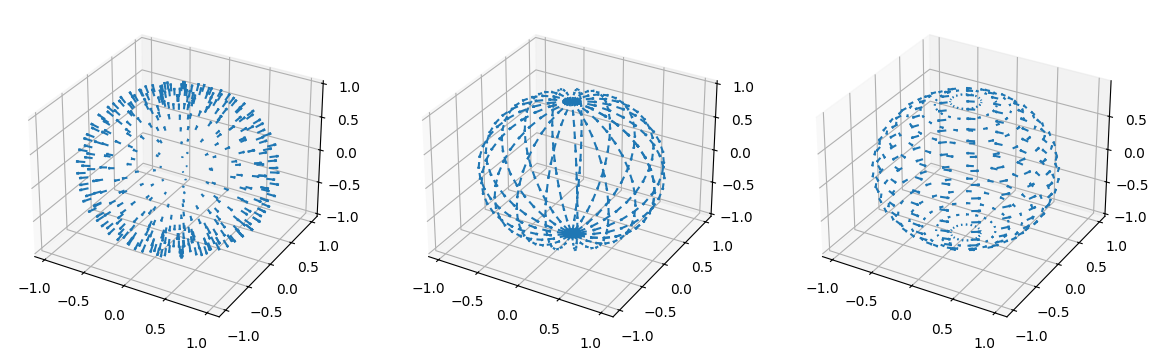

In [3]:
tt, pp = np.meshgrid(np.linspace(0, np.pi, 20), np.linspace(0, 2*np.pi, 20))
xx, yy, zz = np.sin(tt)*np.cos(pp), np.sin(tt)*np.sin(pp), np.cos(tt)
fig = plt.figure(figsize=plt.figaspect(1/3))
ax = fig.add_subplot(131, projection='3d')
quiver_param = {
    'length': .1,
    'arrow_length_ratio': .3,
}
ax.quiver(xx, yy, zz, 
          np.sin(tt)*np.cos(pp), np.sin(tt)*np.sin(pp), np.cos(tt), **quiver_param)
ax = fig.add_subplot(132, projection='3d')
ax.quiver(xx, yy, zz,
          np.cos(tt)*np.cos(pp), np.cos(tt)*np.sin(pp), -np.sin(tt), **quiver_param)
ax = fig.add_subplot(133, projection='3d')
ax.quiver(xx, yy, zz, -np.sin(tt)*np.sin(pp), np.sin(tt)*np.cos(pp), 0, **quiver_param)

plt.savefig('img/ch-5/5-10.png', dpi=600, bbox_inches='tight')

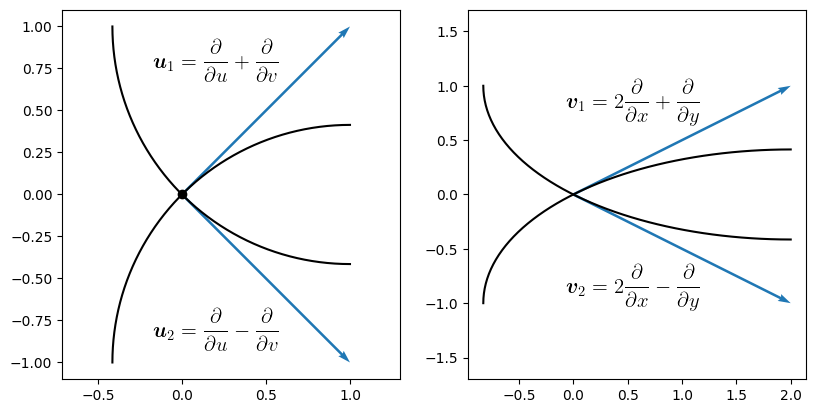

C:\Users\hyosa\AppData\Local\Temp\ipykernel_14796\3297129997.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(t, y*np.ones_like(t), 'k--', color='C0')
C:\Users\hyosa\AppData\Local\Temp\ipykernel_14796\3297129997.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(*f(t, y*np.ones_like(t)), 'k--', color='C0')


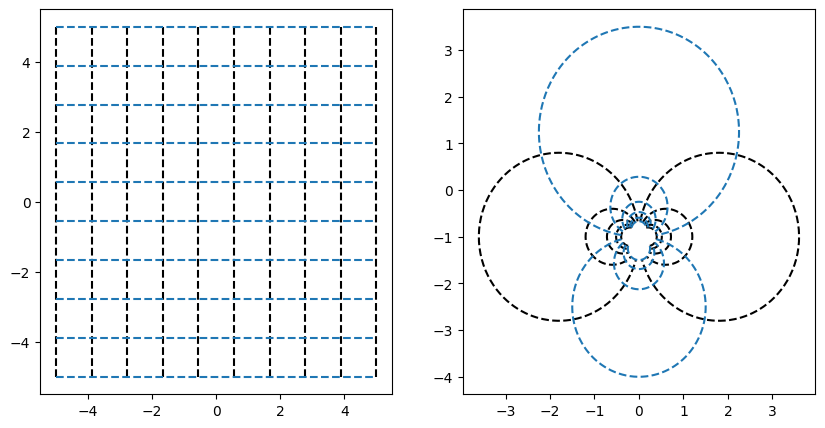

In [4]:
# 함수 (5.59)의 정의역의 격자선을 치역 곡선으로 도식화
f = lambda u, v: np.array([2*u/(u**2 + (1-v)**2), (1-u**2 -v**2)/(u**2 + (1-v)**2)])
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

t = np.linspace(-5, 5, 1000)
for x in np.linspace(-5, 5, 10):
    ax[0].plot(x*np.ones_like(t), t, 'k--')
    ax[1].plot(*f(x*np.ones_like(t), t), 'k--')

for y in np.linspace(-5, 5, 10):
    ax[0].plot(t, y*np.ones_like(t), 'k--', color='C0')
    ax[1].plot(*f(t, y*np.ones_like(t)), 'k--', color='C0')

plt.savefig('img/ch-5/5-13.png', dpi=600, bbox_inches='tight') 

## 5.4 프로젝트: 열전달 지도 그리기 

In [5]:
# 함수 (5.70)의 구현
def theta(x, y):
    return np.arccos(x/np.sqrt(x**2+y**2))

def h(x,y,c): 
    t = c[0] + (c[3]-c[0])/np.pi*theta(x-1, y)
    t += (c[2]-c[3])/np.pi*theta(x, y)
    t += (c[1]-c[2])/np.pi*theta(x+1, y)
    return t

In [6]:
# 함수 (5.67)과 열분포함수 H의 구현
def T(u, v):
    return np.array([2*u/(u**2+(1-v)**2),
                     (1-u**2-v**2)/(u**2+(1-v)**2)])

def H(u, v, c):
    return h(*T(u, v), c)

In [7]:
# 함수 (5.72)의 구현
def radius(x, y):
    return np.sqrt(x**2 + y**2)

def phi(x, y, c):
    r = (c[3]-c[0])/np.pi*np.log(radius(x-1, y))
    r += (c[2]-c[3])/np.pi*np.log(radius(x, y))
    r += (c[1]-c[2])/np.pi*np.log(radius(x+1, y))
    return r

def Phi(u, v, c):
    return phi(*T(u, v), c)

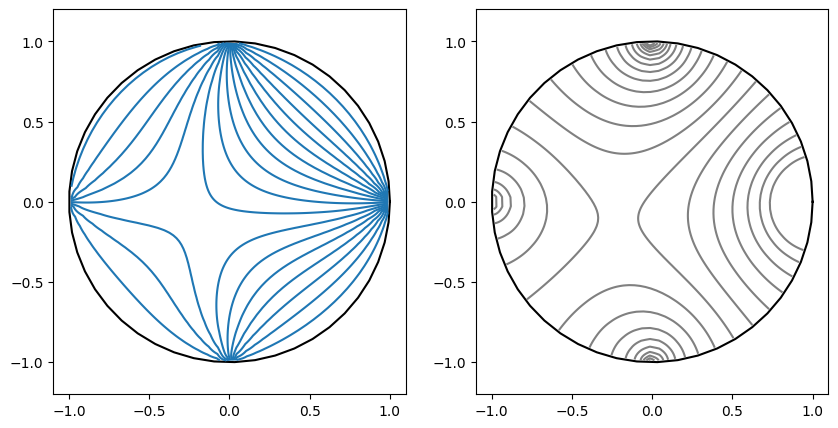

In [8]:
# 열등위선과 열전달 경로의 시각화
c = np.array([-10,20,5,25])

rr, tt = np.meshgrid(np.linspace(.01,.99,200), np.linspace(0,2*np.pi,100))
uu, vv = rr*np.cos(tt), rr*np.sin(tt)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

t = np.linspace(0, 2*np.pi)
for i in range(2):
    ax[i].plot(np.cos(t), np.sin(t), 'k')
    ax[i].axis('equal')
    ax[i].set_xlim(-1.2, 1.2)
    ax[i].set_ylim(-1.2, 1.2)

ax[0].contour(uu, vv, H(uu, vv, c), 
                levels=np.linspace(-10, 25, 20), 
                linestyles='-',
                colors='C0')

ax[1].contour(uu, vv, Phi(uu, vv, c),
                levels=np.linspace(-10, 40, 20), 
                linestyles='-',
                colors='gray')

plt.savefig('img/ch-5/5-17.png', dpi=600, bbox_inches='tight')
